In [1]:
! pip install squarify

# Census Income Project (Evaluation Project - 5)

Problem Statement:--
   
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
    

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


# Importing Libraries

In [2]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



# Importing data


In [3]:
# import dataset

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Observation:-
    
In the above dataset there are 32560 rows and 15 columns are there.This dataset is a mixture of numerical data columns and text data columns that we will treat accordingly.According to problem statement which states that we are suppose to predict the "Income" column.Income is divided into two classes  namely "<=50K" and ">50K", so it makes this as a Classification problem.

In [5]:
# Checking shapes

data.shape


(32560, 15)

Observation:
    
Dataset has 32560 rows and 15 columns.

In [6]:
# Checking columns names

data.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Observations:
    
There is no null values in the dataset.

# Finding duplicate values

In [7]:
# Checking duplicate Values

data.duplicated().sum()


24

In [8]:
data.drop_duplicates(keep= 'first',inplace= True )

In [9]:

data.shape


(32536, 15)

In [10]:
data.duplicated().sum()

0

# Statistical Summary

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


Observation:
    
The count/rows occupied by the columns and since all of them have the same number it indicates.

There are no missing values in them.

We can see abnormality in the columns "Capital_gain" and "Capital_loss" that have the value 0.0 for minimum value, 25% data slot, 50% data slot and 75% data slot.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Observation:
    
we can see that there are 6 columns with integer data type and 9 columns that have object data type.

In [13]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Observations:
    
9 are object datatype that is categorical data and 6 are int datatype.

Target variable is Income which is a categorical data, needs classification model to predict this.

Seems outliers are present in the overall dataset because most of the features has a difference between 75% percentile and max value.

Income has two different categories

In [14]:
data["Workclass"]. unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Observation:

 Dataset has "?" sign.

In [15]:
data.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

Observations:
    
Replacing "?" with Nan.

In [16]:
data=data.replace(' ?',np.NaN)


Observations:
    
Checking 'NA', space or '-' present in dataset

In [17]:
data.isin([' ','NA','-']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observations:
    
Replacing ' ?' with np.NaN
No blank space, '-', '?',NA exist in dataset.

# Checking Null Values

In [18]:
# Checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("Null value details \n\n", pd.concat(l , axis =1, keys =['Null Values', 'Null Values percentage']))


Null value details 

                 Null Values  Null Values percentage
Age                       0                0.000000
Workclass              1836                5.642980
Fnlwgt                    0                0.000000
Education                 0                0.000000
Education_num             0                0.000000
Marital_status            0                0.000000
Occupation             1843                5.664495
Relationship              0                0.000000
Race                      0                0.000000
Sex                       0                0.000000
Capital_gain              0                0.000000
Capital_loss              0                0.000000
Hours_per_week            0                0.000000
Native_country          582                1.788788
Income                    0                0.000000


<AxesSubplot:>

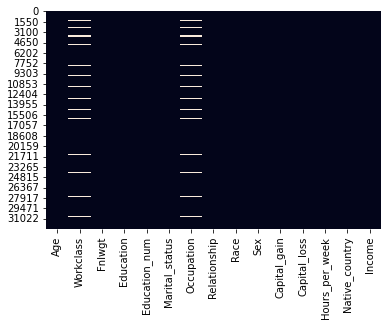

In [19]:
sns.heatmap(data.isnull(),cbar=False)


Observation:
    
There is No duplicate rows in dataset.

# Imputation  of Missing values 


Native country,Occupation, Workclass  are categorical variables so we can imputate them.

In [20]:
# Imputating Missing value with mode for categorical features
data['Occupation'].fillna(data['Occupation'].mode()[0],inplace=True)
data['Workclass'].fillna(data['Workclass'].mode()[0],inplace=True)
data['Native_country'].fillna(data['Native_country'].mode()[0],inplace=True)


Observation :
    
Successfully replaced all the "?" data present in dataset "Native country","Workclass","Occupation" with meaningful values.
    
Now no Missing Value is Present.

# Statistical analysis:

In [21]:
data.describe().round(2)


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.00,32536.00,32536.00,32536.00,32536.00,32536.00
mean,38.59,189784.30,10.08,1078.41,87.37,40.44
std,13.64,105556.26,2.57,7388.07,403.11,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117831.50,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,236993.25,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


Observation:
    
Number of hours_per_week varies between 1 to 99.   

Minimum and maximum age of people in the dataset is 17 and 90 years.

The 25%,50% and 75% percentile is 0. It shows that there must be some error in dataset.

Minimum of Capital_gain, Capital_loss and Hours_per_week is 0.

Minimum and maximum Education_num is 1 and 16 respectively.





# Exploratory Data Analysis

# Uni-variate Analysis
    
    

For categorical Variable

In [22]:
cat=["Workclass", "Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"]
for i in cat:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)


Value counts of Workclass is---
  Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Value counts of Education is---
  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Value counts of Marital_status is---
  Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype:

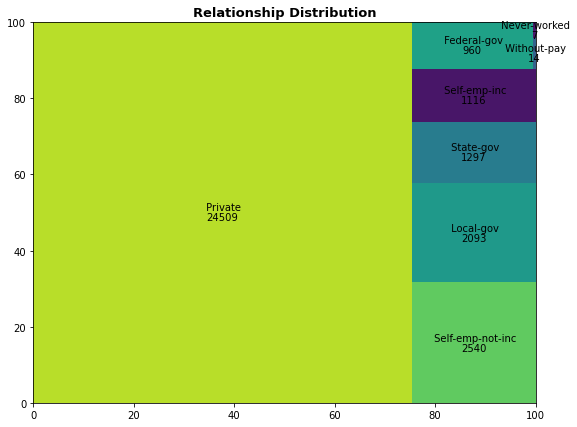

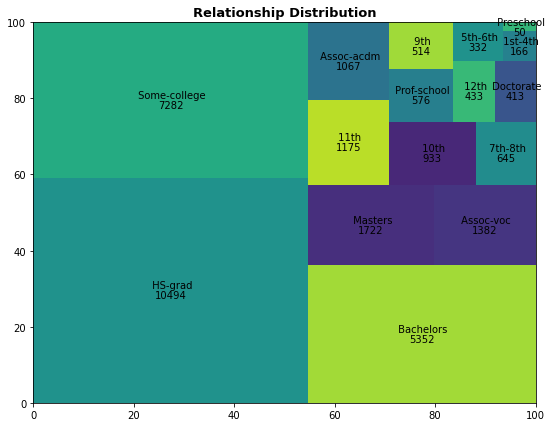

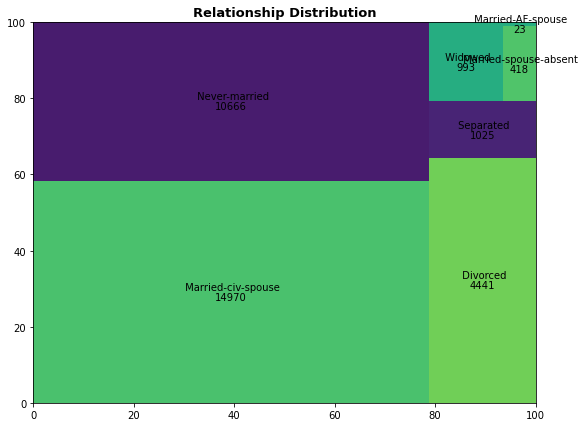

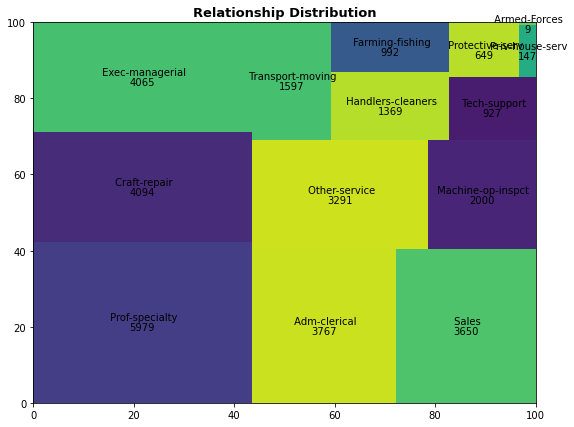

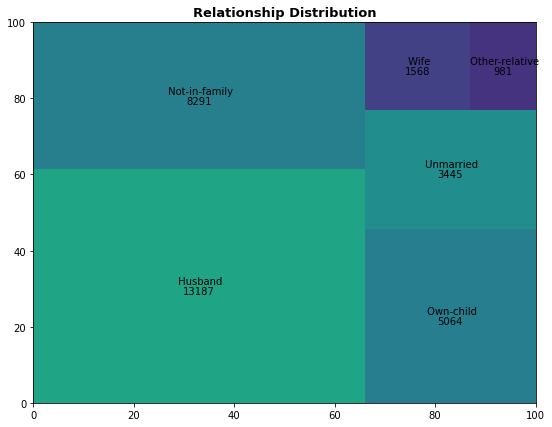

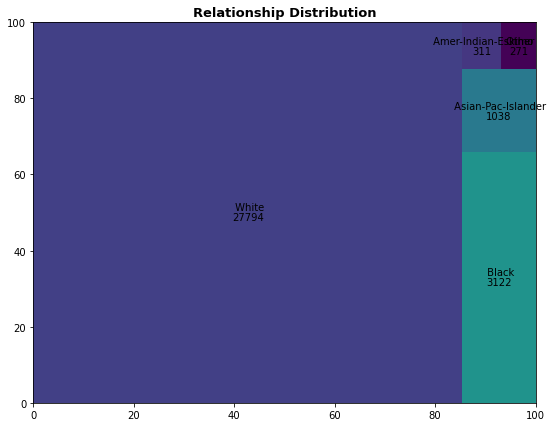

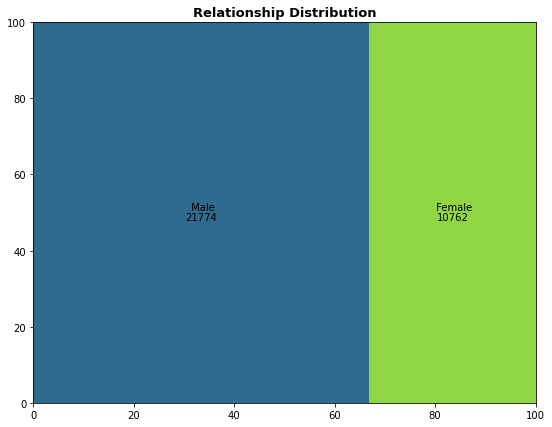

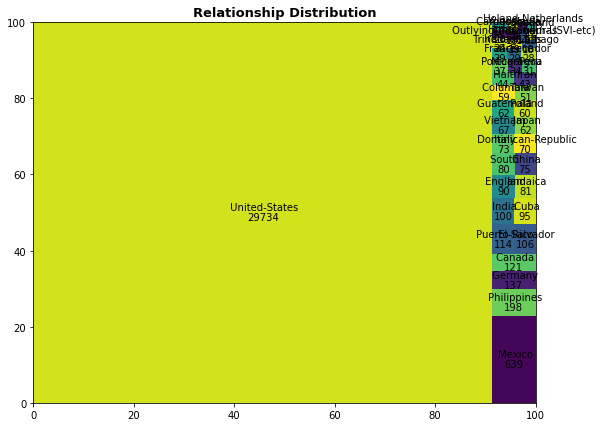

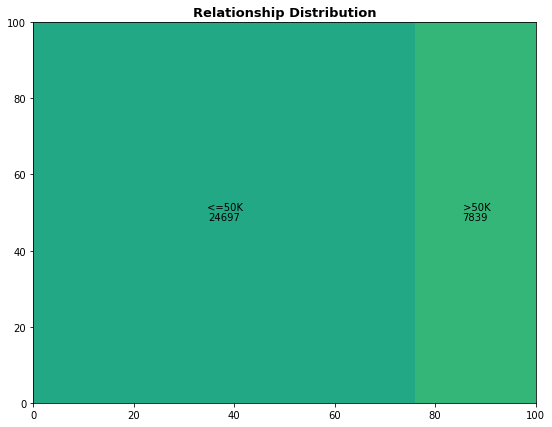

In [23]:
import squarify
for i in cat:
    plt.figure(figsize=(9, 7))
    reln = data[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship Distribution', fontdict={'fontsize': 13, 'fontweight': 'bold'})
    plt.show()


Observation:

Maximum no of people worked in private sector.

Maximum no of people are in 12th standard.

There is low no of Doctorate and pre school standard.

Maximum no of people belong to professional group.Very low no of people are worked in Armed Forces.

Maximum no of people Married civilian spouse.Low no of people married to Armed Forces spouse.



# Visualization

#  Numerical variable

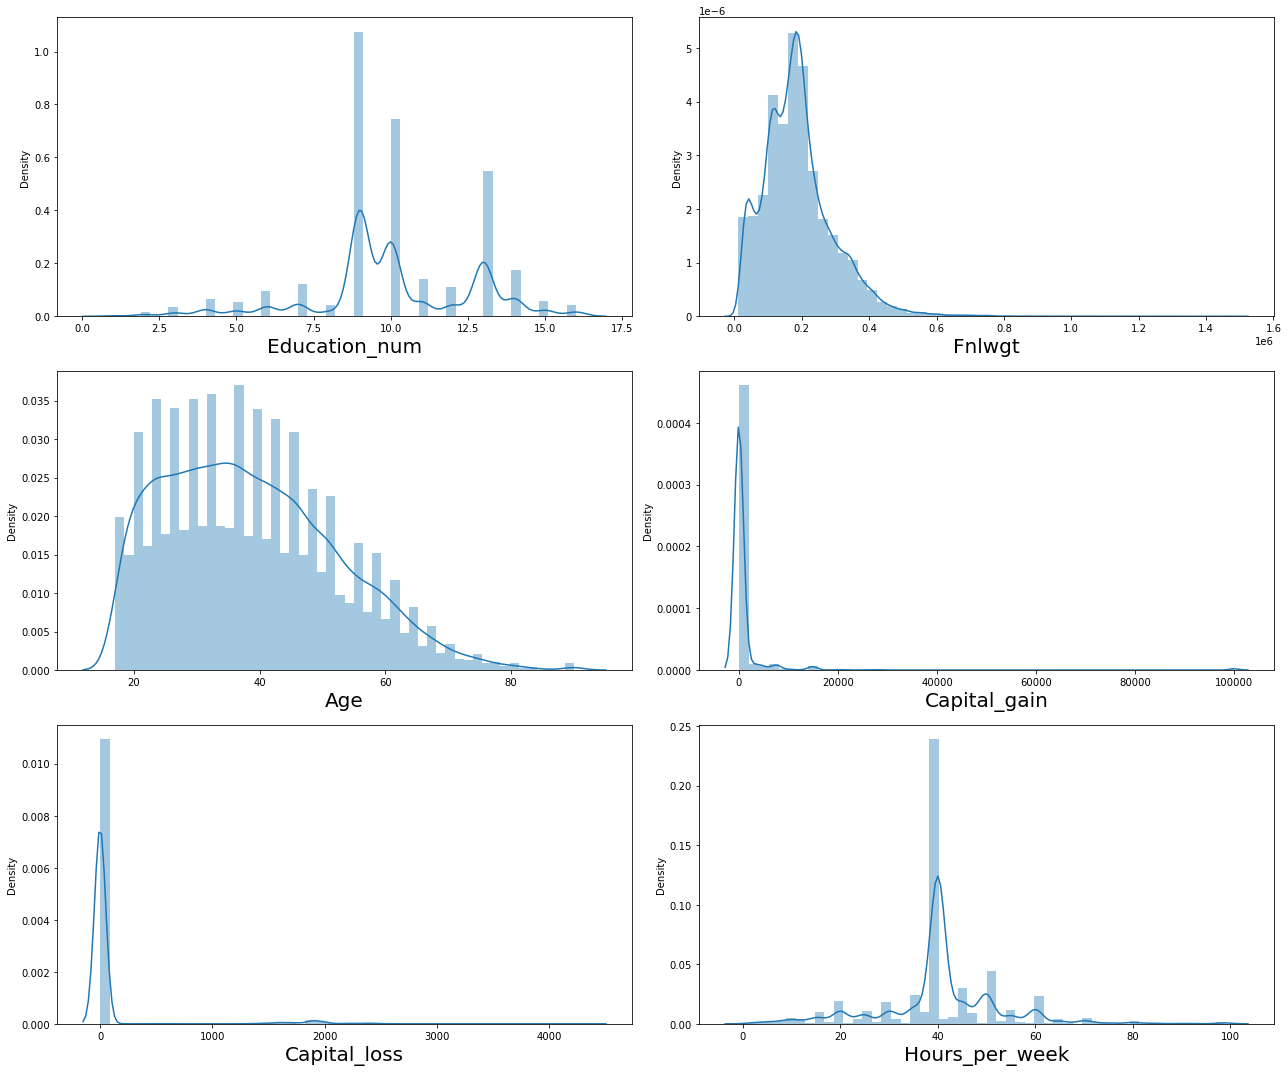

In [24]:
# Numerical Distribution

data_num = data[["Education_num","Fnlwgt","Age", "Capital_gain", "Capital_loss", "Hours_per_week"]]
i=0
plt.figure(figsize=(18,15))
for p in data_num.columns:
    plt.subplot(3,2,i+1)
    sns.distplot(data_num[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

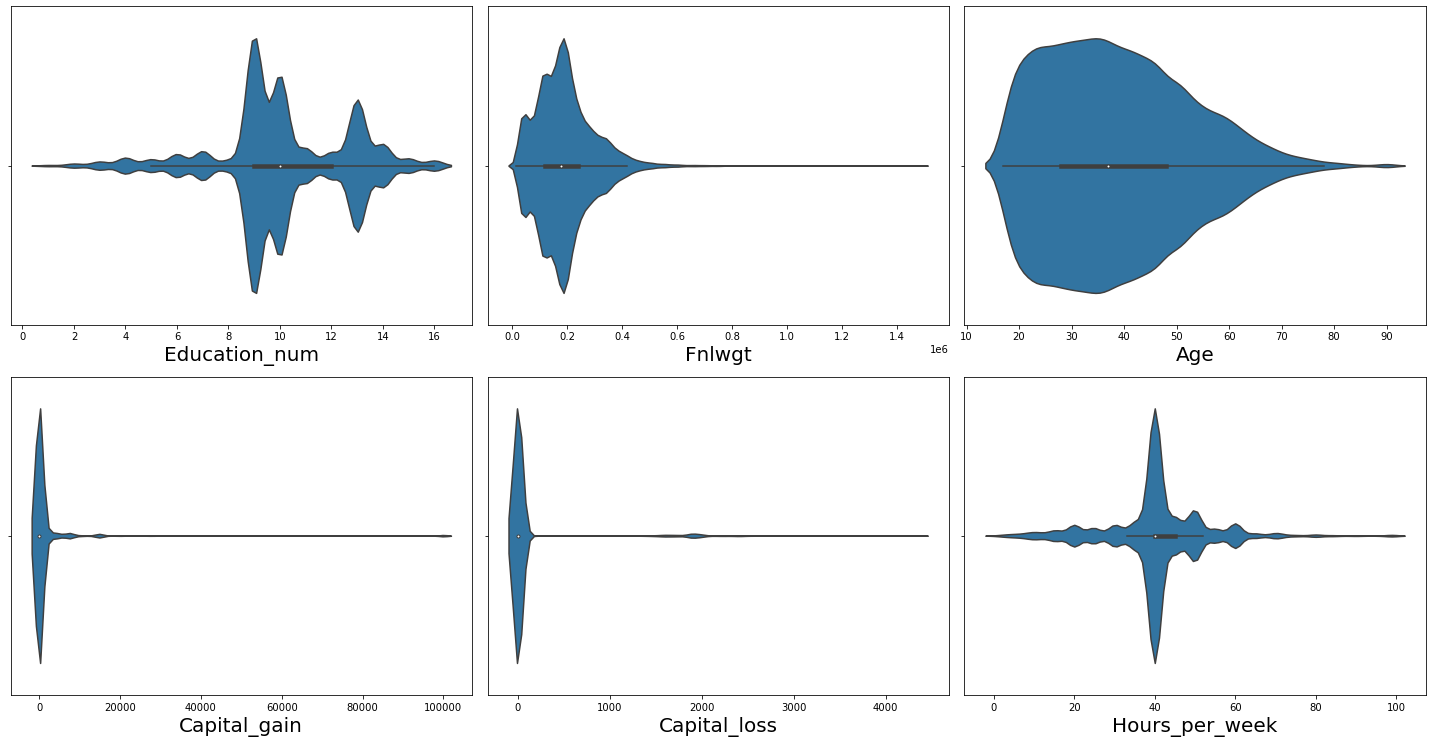

In [25]:
i=0
plt.figure(figsize=(20,15))
for p in data_num.columns:
    plt.subplot(3,3,i+1)
    sns.violinplot(data_num[p])
    plt.xlabel(p,fontsize=20)
    i+=1
    
plt.tight_layout()

Observation:
    
Range of age is 20-80 years and range of Fnlwgt is 0-0.4.

Working hours per week is 40 hrs(Max),gain of capital and maximum loss is 0.

Number of maximum education of year is 9-10 years.

There is right skewness in dataset.

#  Target Analysis

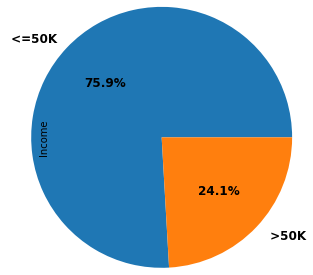

In [26]:
data['Income'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':12,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()


Observation :
    
Population have income less than 50K is 75.9% and population income greater than 50k is 24.1%.

Dataset of Income is imbalanced.

# Relation between Target Variable and other features

# Bi-variate Analysis

Income vs Workclass

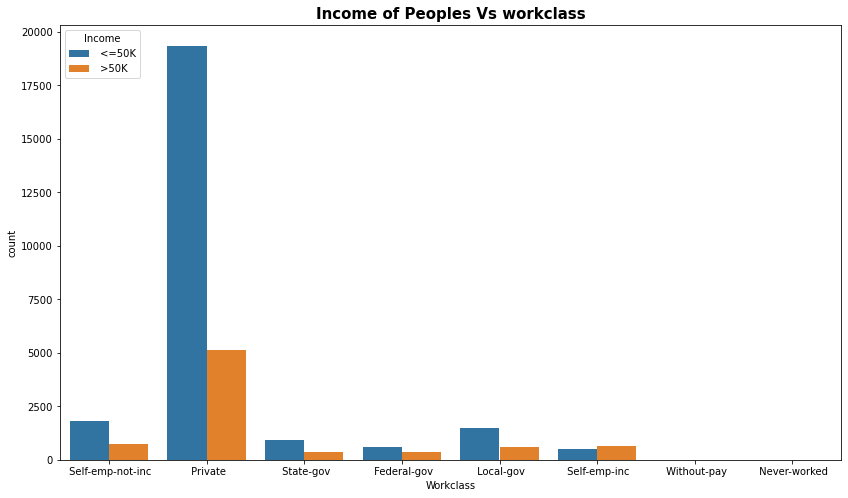

In [27]:
plt.figure(figsize=(14,8))
sns.countplot(data['Workclass'], hue= data['Income'])
plt.title('Income of Peoples Vs workclass', fontsize=15, fontweight='bold')
plt.xlabel('Workclass')
plt.show()



In [28]:
pd.crosstab(data['Income'],data["Workclass"], margins= True)


Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


Observation:
    
private class is the maximum source of Income and its range is <=50K.

In Self Employed people who earn >50K are less than the number of people who earn 50K.

Number of people who Never-worked or Without-pay is very less and there income range is also low.

Income Vs Education

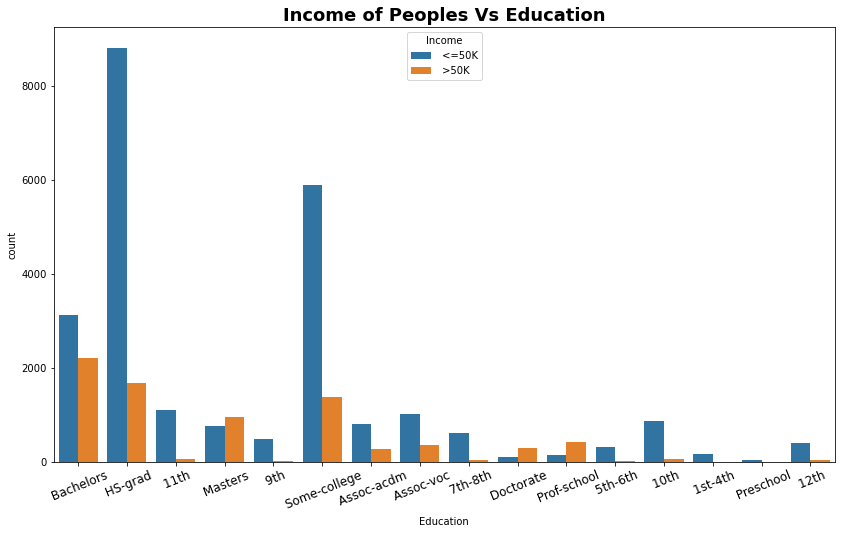

In [29]:
plt.figure(figsize=(14,8))
sns.countplot(data['Education'], hue= data['Income'])
plt.title('Income of Peoples Vs Education', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12,rotation=22)
plt.show()


In [30]:
pd.crosstab(data['Income'],data["Education"], margins= True)

Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
Income,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,160,316,605,487,802,1021,3131,107,8820,763,50,153,5896,24697
>50K,62,60,33,6,16,40,27,265,361,2221,306,1674,959,0,423,1386,7839
All,933,1175,433,166,332,645,514,1067,1382,5352,413,10494,1722,50,576,7282,32536


Observation:

Maximum number of Bachelors who earn more than 50k.   

People with qualification upto HS grad  are more in numbers and there income range is <=50K.

Number of people in preschool level are very few. It is quite obvious that they earn less than 50K.

Doctorate group has very few in numbers.There are highly qualified and maximum people income range is >50K.





Income VS Marital status

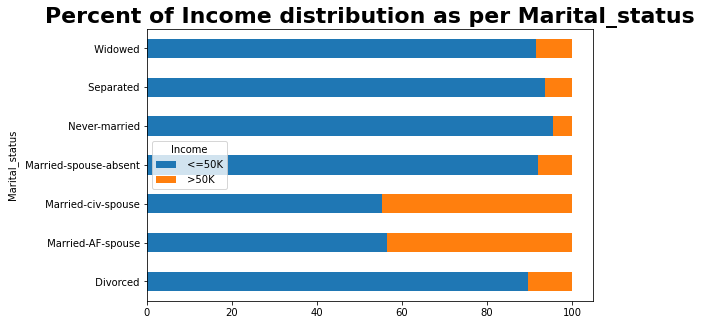

In [31]:
table= pd.crosstab(data['Marital_status'], data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of Income distribution as per Marital_status', fontsize=22, fontweight='bold')
plt.show()


In [32]:
pd.crosstab(data['Income'],data["Marital_status"], margins= True)


Marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
Income,,,,,,,,
<=50K,3978,13,8280,384,10175,959,908,24697
>50K,463,10,6690,34,491,66,85,7839
All,4441,23,14970,418,10666,1025,993,32536


Observation:
    
More than 7k peoples who earned more than 50K.
 
Those who comes in  never married category, arround 95% earned less than 50K.
    
Most of the people who have earned more than 50K are married civilian spouse. 




Income Vs Occupation

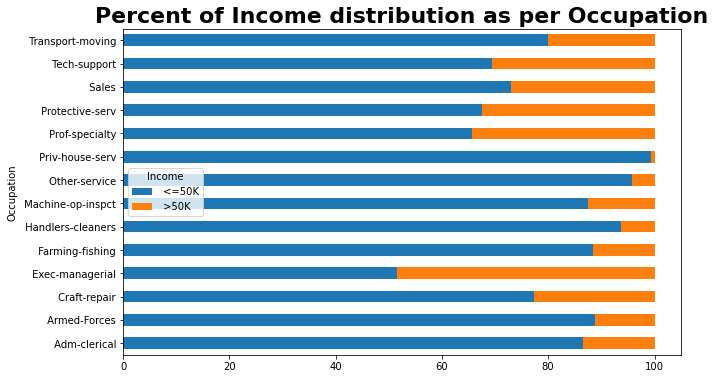

In [33]:
table= pd.crosstab(data['Occupation'], data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(10,6))
plt.title('Percent of Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.show()


In [34]:
pd.crosstab(data['Occupation'],data["Income"], margins=True).T


Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
Income,,,,,,,,,,,,,,,
<=50K,3260,8,3165,2097,877,1283,1751,3154,146,3930,438,2667,644,1277,24697
>50K,507,1,929,1968,115,86,249,137,1,2049,211,983,283,320,7839
All,3767,9,4094,4065,992,1369,2000,3291,147,5979,649,3650,927,1597,32536


 Observation:

Those who worked in protective service, prof- specialty,tech support, sales are more likely to earn more than 50K in a year.
    
Around 100% people are in <50K income group.

People from priv-house-serv only 1 person got more than 50K.




Income Vs Relationship:

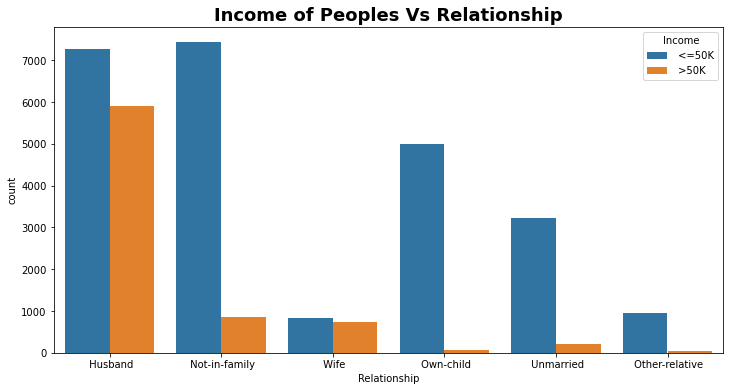

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data['Relationship'], hue= data['Income'])
plt.title('Income of Peoples Vs Relationship', fontsize=18, fontweight='bold')
plt.show()


In [36]:
pd.crosstab(data['Relationship'],data["Income"], margins=True).T

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
Income,,,,,,,
<=50K,7271,7435,944,4997,3227,823,24697
>50K,5916,856,37,67,218,745,7839
All,13187,8291,981,5064,3445,1568,32536


Observation:
    
The ratio of two type of income group is around 50:50 in Wife category.

Max income is <50k for Own-child group.

Income Vs Race:

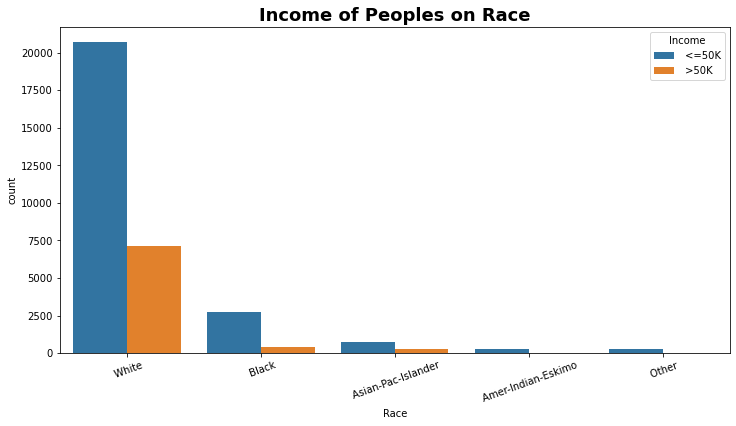

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data['Race'], hue= data['Income'])
plt.title('Income of Peoples on Race', fontsize=18, fontweight='bold')
plt.xlabel('Race')
plt.xticks(fontsize=10,rotation=20)
plt.show()


In [38]:
pd.crosstab(data['Race'],data["Income"], margins=True).T

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Income,,,,,,
<=50K,275,762,2735,246,20679,24697
>50K,36,276,387,25,7115,7839
All,311,1038,3122,271,27794,32536


Observation:
    
Income range of most of the  white people is greater than 50K.

Community has 86 % whites, 9% black and rest are others.



Income Vs Sex:

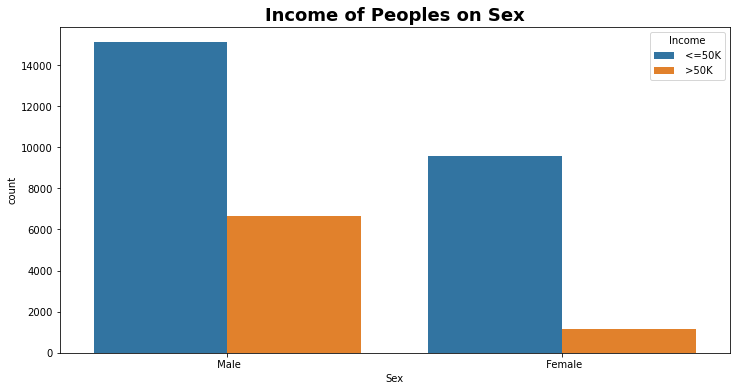

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(data['Sex'], hue= data['Income'])
plt.title('Income of Peoples on Sex', fontsize=18, fontweight='bold')
plt.xlabel('Sex')
plt.show()

In [40]:
pd.crosstab(data['Sex'],data["Income"], margins=True).T

Sex,Female,Male,All
Income,,,
<=50K,9583,15114,24697
>50K,1179,6660,7839
All,10762,21774,32536


Observation:
    
There are 67%  Male in the population.

Approx 1k women who comes under 50k plus earning income group.

Income Vs Native country:

In [41]:
pd.crosstab(data['Native_country'],data["Income"], margins=True)


Income,<=50K,>50K,All
Native_country,,,
Cambodia,12,7,19
Canada,82,39,121
China,55,20,75
Columbia,57,2,59
Cuba,70,25,95
Dominican-Republic,68,2,70
Ecuador,24,4,28
El-Salvador,97,9,106
England,60,30,90


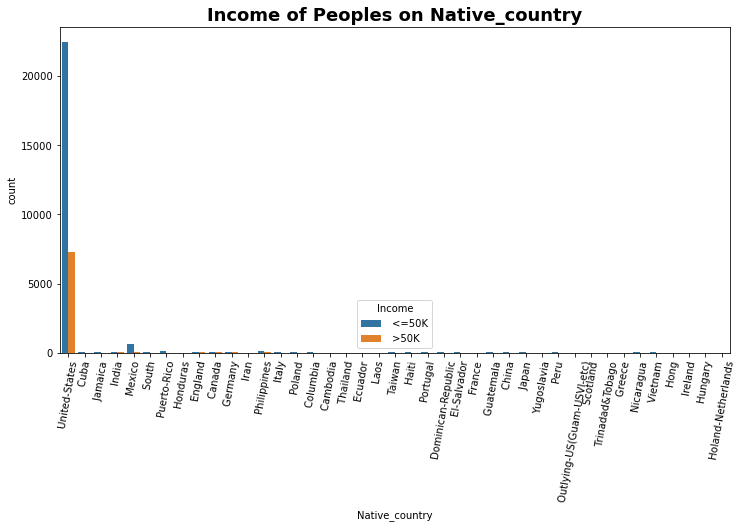

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data['Native_country'], hue= data['Income'])
plt.title('Income of Peoples on Native_country', fontsize=18, fontweight='bold')
plt.xlabel('Native_country')
plt.xticks(fontsize=10,rotation=80)
plt.show()


In [43]:
pd.crosstab(data['Native_country'],data["Income"], margins=True).T


Native_country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,All
Income,,,,,,,,,,,,,,,,,,,,,
<=50K,12,82,55,57,70,68,24,97,60,17,...,102,9,64,31,15,17,22419,62,10,24697
>50K,7,39,20,2,25,2,4,9,30,12,...,12,3,16,20,3,2,7315,5,6,7839
All,19,121,75,59,95,70,28,106,90,29,...,114,12,80,51,18,19,29734,67,16,32536


Observation:
    
There are maximum number 91.4 % of people from United-States followed by Mexico people and 6.6% are of other countries.



Income vs Age:

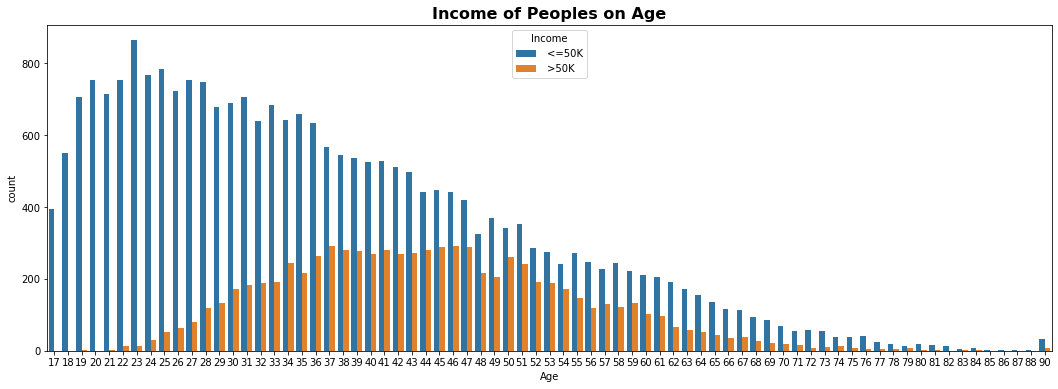

In [44]:
plt.figure(figsize=(18, 6))
sns.countplot(data['Age'], hue=data['Income'])
plt.title('Income of Peoples on Age', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Age')
plt.show()


Observation:
    
Maximum no of people with income range more than 50K are in 37-50years age group. 

People who are in 20-30 years age group has salary range less than 50K/year.

10.Income Vs Education:

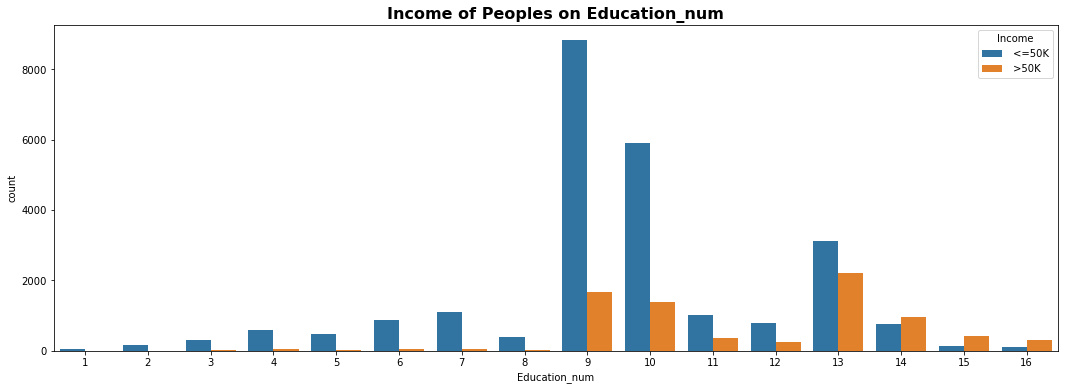

In [45]:
plt.figure(figsize=(18, 6))
sns.countplot(data['Education_num'], hue=data['Income'])
plt.title('Income of Peoples on Education_num', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Education_num')
plt.show()


Observations:
    
People who has Maximum no of year of education is 9years get <=50K salary.

The maximum no of people who has 14, 15, 16 years of education get >50K salary.

Income Vs Capital gain:

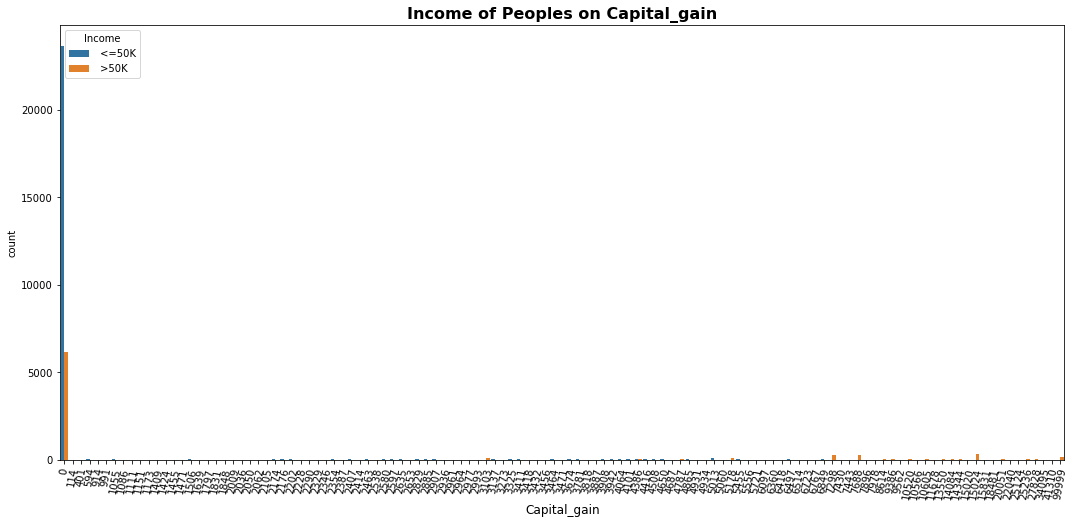

In [46]:
plt.figure(figsize=(18,8))
sns.countplot(data['Capital_gain'], hue=data['Income'])
plt.title('Income of Peoples on Capital_gain', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xticks(fontsize=10,rotation=80)
plt.xlabel('Capital_gain', fontsize= 12)
plt.show()

In [47]:
pd.crosstab(data['Capital_gain']==0, data["Income"], margins=True)

Income,<=50K,>50K,All
Capital_gain,,,
False,1034,1677,2711
True,23663,6162,29825
All,24697,7839,32536


In [48]:
29825/32536


0.9166769117285468

Observations:
    
Maximum capital gain is 0.

Maximum people of them are in less than 50K income group and rest are in greater than 50K income group .

There is skewness in it.

 Income Vs Capital loss

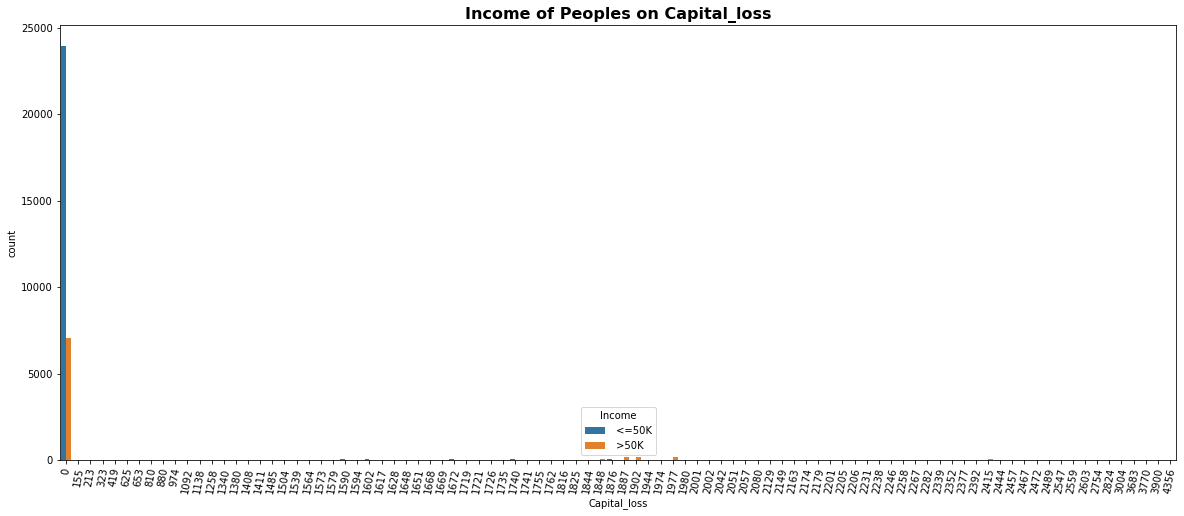

In [49]:
plt.figure(figsize=(20,8))
sns.countplot(data['Capital_loss'], hue=data['Income'])
plt.title('Income of Peoples on Capital_loss', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xticks(fontsize=10,rotation=80)
plt.show()



In [50]:
pd.crosstab(data['Capital_loss']==0, data["Income"], margins=True)


Income,<=50K,>50K,All
Capital_loss,,,
False,746,773,1519
True,23951,7066,31017
All,24697,7839,32536


In [51]:
31017/32536

0.9533132530120482

Observation:
    
Maximum capital loss is 0. 

Maximum of them are in less than 50K income group and rest in > 50K income group.

Skewness Present in it.

  Income Vs Hours per week:

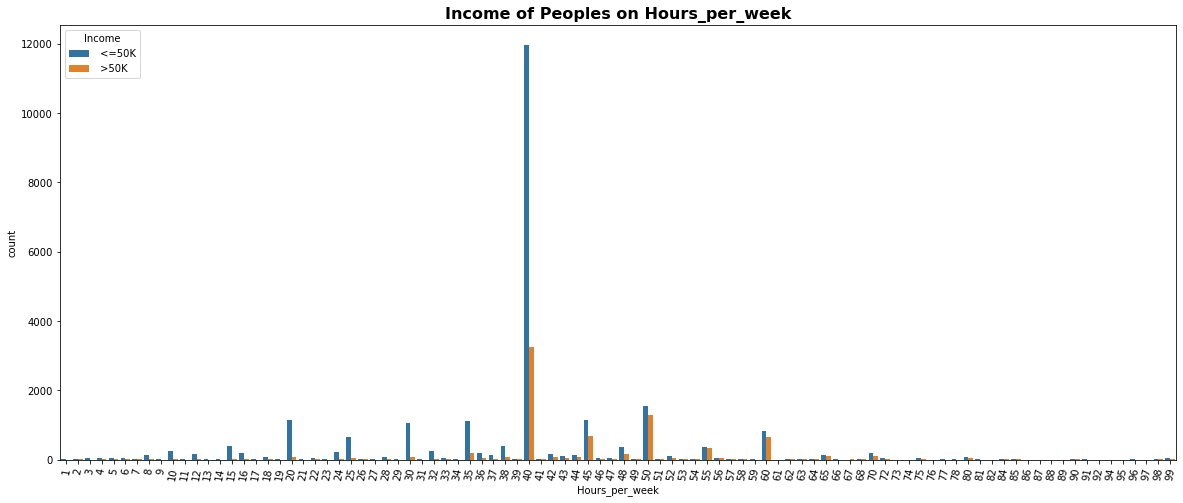

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(data['Hours_per_week'], hue=data['Income'])
plt.title('Income of Peoples on Hours_per_week', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xticks(fontsize=10,rotation=80)
plt.show()


In [53]:
pd.crosstab(data['Hours_per_week']==40, data["Income"], margins=True)


Income,<=50K,>50K,All
Hours_per_week,,,
False,12740,4593,17333
True,11957,3246,15203
All,24697,7839,32536


In [54]:
15203/32536

0.46726702729284486

Observations:
    
Maximum Hours/week is 40 with 15203 people.

Range of Work hour is 40-50 hours.


# Exploration of features


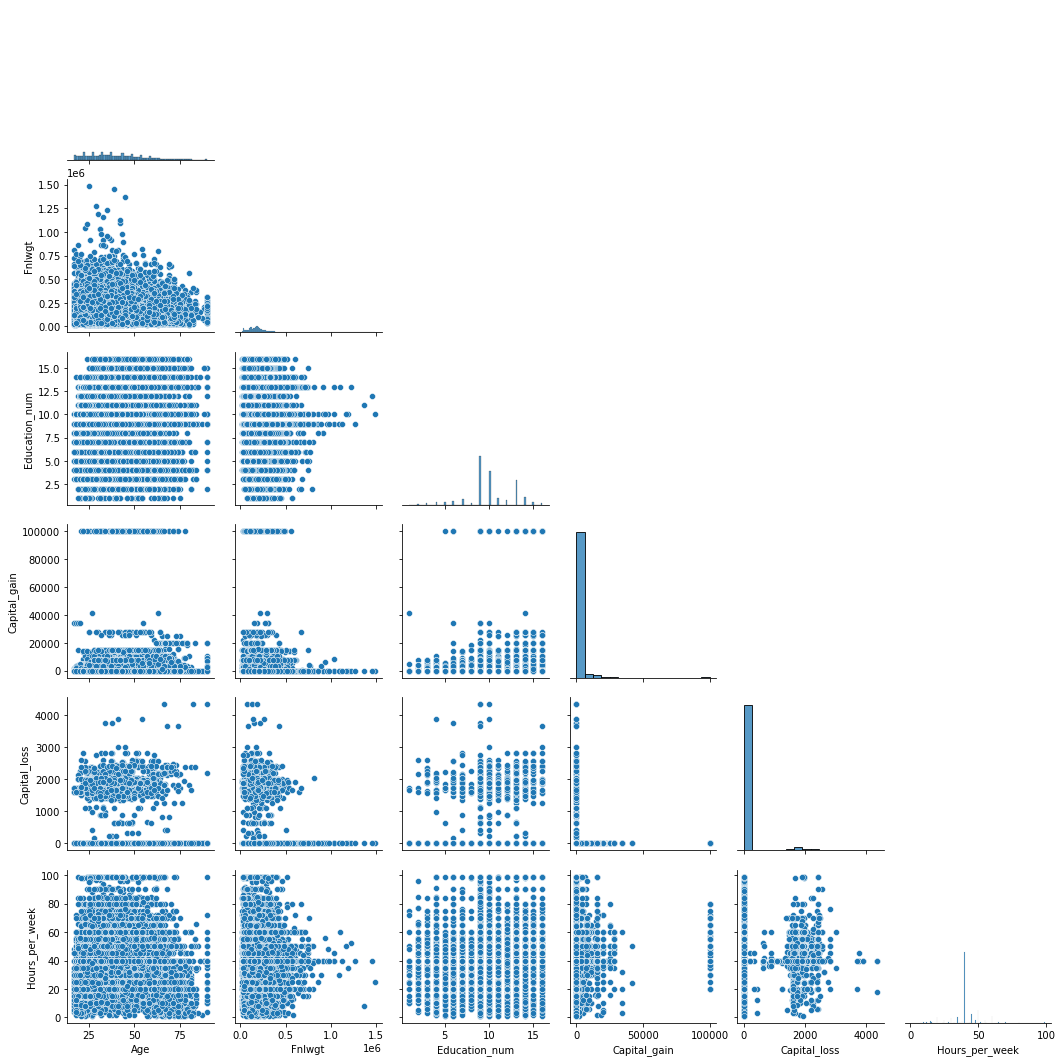

In [55]:
# Exploring other features
sns.pairplot(data, kind='scatter', corner=True)
plt.show()


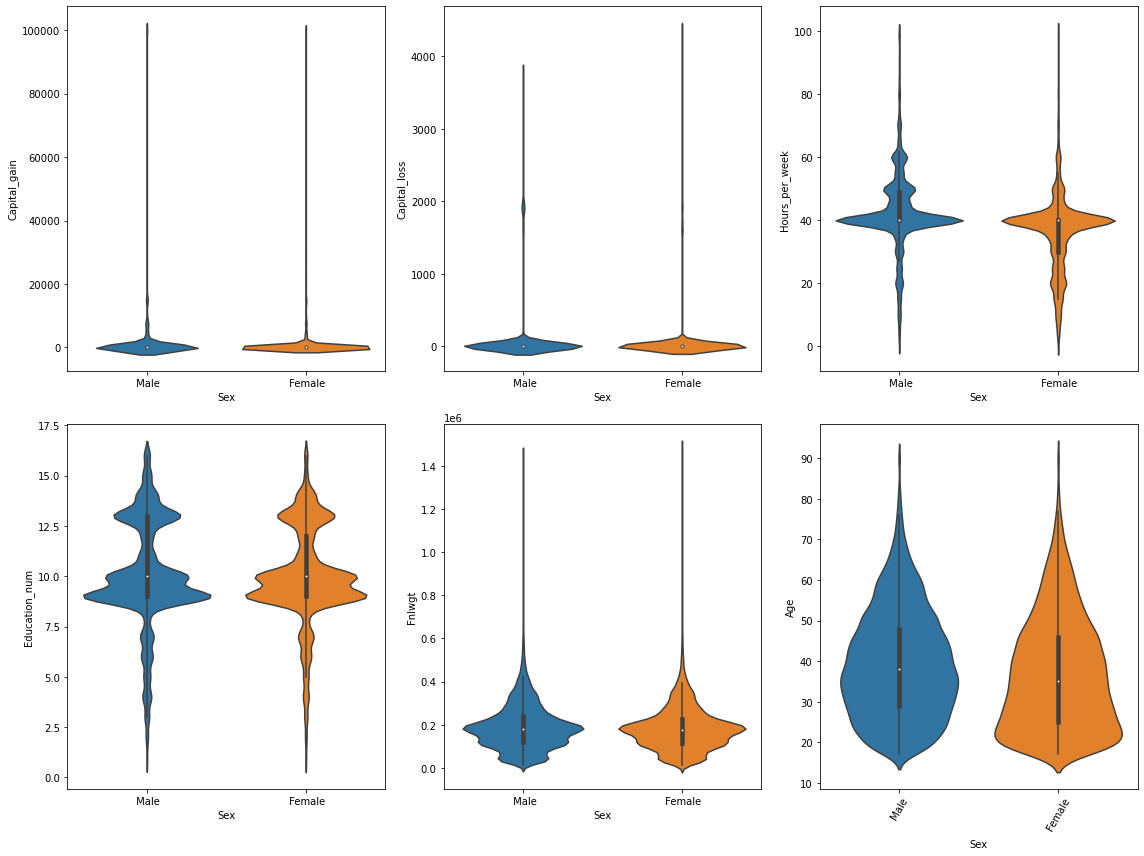

In [56]:
fig,axes=plt.subplots(2,3,figsize=(16,12))

sns.violinplot(x = data['Sex'], y = data['Education_num'], data = data, ax=axes[1,0])
plt.xticks(fontsize=10,rotation=60)
sns.violinplot(x = data['Sex'], y = data['Fnlwgt'], data = data, ax=axes[1,1])
plt.xticks(fontsize=10,rotation=60)
sns.violinplot(x = data['Sex'], y = data['Age'], data = data, ax=axes[1,2])
plt.xticks(fontsize=10,rotation=60)
sns.violinplot(x = data['Sex'], y = data['Capital_gain'], data = data, ax=axes[0,0])
plt.xticks(fontsize=10,rotation=60)
sns.violinplot(x = data['Sex'], y = data['Capital_loss'], data = data, ax=axes[0,1])
plt.xticks(fontsize=10,rotation=60)
sns.violinplot(x = data['Sex'], y = data['Hours_per_week'], data = data, ax=axes[0,2])
plt.xticks(fontsize=10,rotation=60)
plt.tight_layout()
plt.show()

Observation:
    
Distribution pattern with Sex column and other features is almost similar.


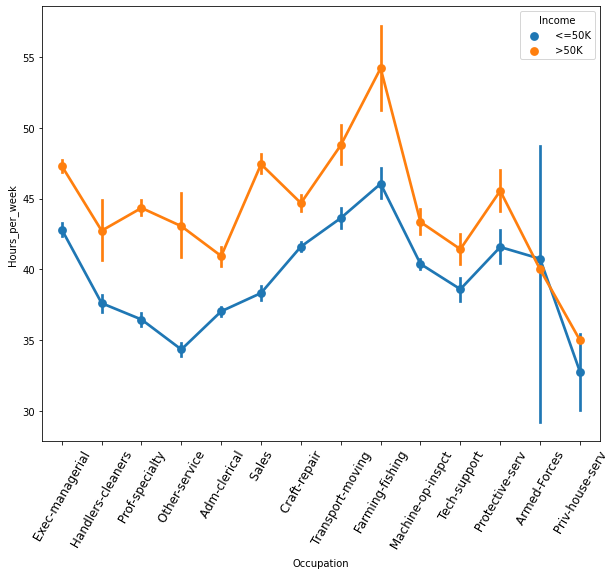

In [57]:
plt.figure(figsize=(10,8))
sns.pointplot(x = data['Occupation'], y = data['Hours_per_week'], data = data,  hue= data['Income'])
plt.xticks(fontsize=12,rotation=60)
plt.show()


Observation:
    
Higher the salary more time need to spend.    

Farmimg and Fishing occupation has maximum hours  of spending.

priv-house-serv occupation has minimum hours of spending.


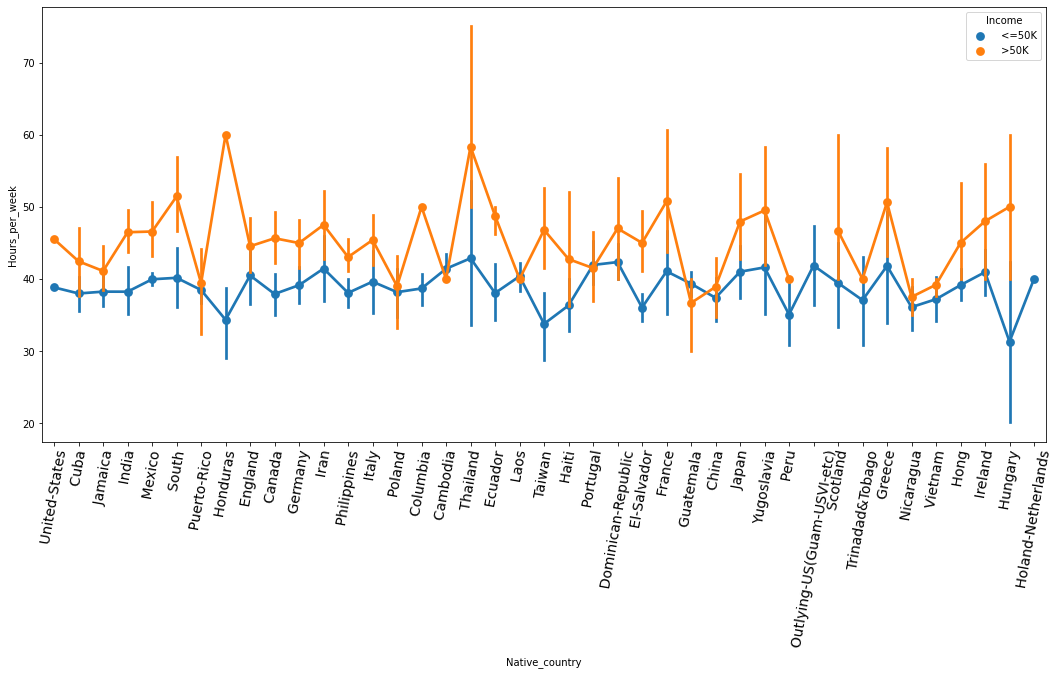

In [58]:
plt.figure(figsize=(18,8))
sns.pointplot(x = data['Native_country'], y = data['Hours_per_week'], data = data,  hue= data['Income'])
plt.xticks(fontsize=14,rotation=80)
plt.show()


Observation:
    
Maximum work hours are in Thailand and Hounduras.

Hungery has low working hours.



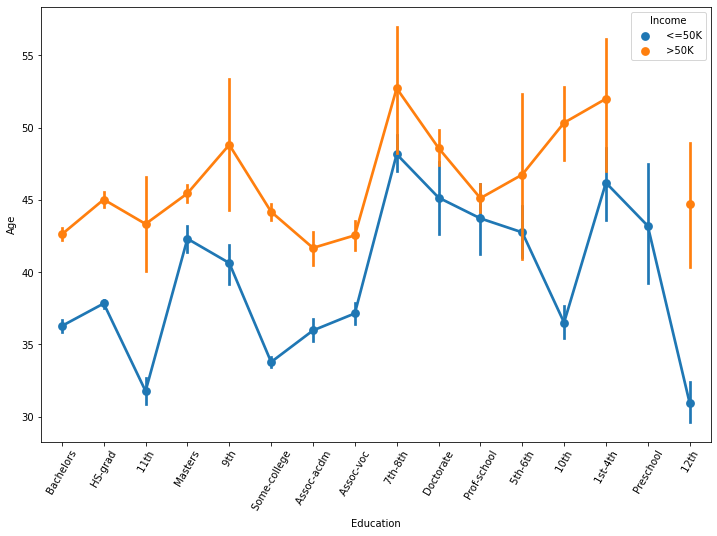

In [59]:
plt.figure(figsize=(12,8))
sns.pointplot(x = data['Education'], y = data['Age'], data = data,  hue= data['Income'])
plt.xticks(fontsize=10,rotation=60)
plt.show()


Observation:
    
People whose education is upto 7-8th std, they earned less than 50K. 

The age range of 45-50 years wheather earned more than 50k.

Age is low for 11-12 std and for doctorate and masters age is high.

Higher the salary of person age is also high compared to the person whose salary is low.


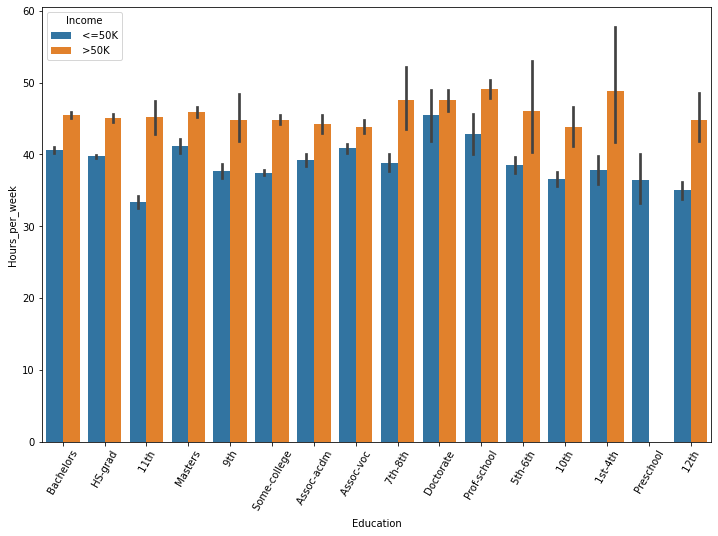

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x = data['Education'], y = data['Hours_per_week'], data = data,  hue= data['Income'])
plt.xticks(fontsize=10,rotation=60)
plt.show()

Observation:
    
For any educational level as hours per week increased, salary is also increased.

In [61]:
pd.crosstab(data['Marital_status'],[data.Income, data.Workclass], margins=True)

Income                        <=50K                                    \
Workclass               Federal-gov  Local-gov  Never-worked  Private   
Marital_status                                                          
 Divorced                       140        329             1     3000   
 Married-AF-spouse                1          0             0       10   
 Married-civ-spouse             167        501             1     5974   
 Married-spouse-absent            9         21             0      310   
 Never-married                  220        489             5     8599   
 Separated                       21         58             0      773   
 Widowed                         31         78             0      691   
All                             589       1476             7    19357   

Income                                                             \
Workclass               Self-emp-inc  Self-emp-not-inc  State-gov   
Marital_status                                                      
 Divorced                         76               246        186   
 Married-AF-spouse                 0                 1          1   
 Married-civ-spouse              271              1073        285   
 Married-spouse-absent             5                23         15   
 Never-married                   109               358        391   
 Separated                        15                51         41   
 Widowed                          18                64         25   
All                              494              1816        944   

Income                                      >50K                      \
Workclass               Without-pay  Federal-gov  Local-gov  Private   
Marital_status                                                         
 Divorced                         0           28         40      301   
 Married-AF-spouse                0            2          0        7   
 Married-civ-spouse               8          304        522     4389   
 Married-spouse-absent            1            2          1       21   
 Never-married                    4           25         41      337   
 Separated                        0            5          5       47   
 Widowed                          1            5          8       50   
All                              14          371        617     5152   

Income                                                               All  
Workclass               Self-emp-inc  Self-emp-not-inc  State-gov         
Marital_status                                                            
 Divorced                         24                46         24   4441  
 Married-AF-spouse                 0                 1          0     23  
 Married-civ-spouse              566               606        303  14970  
 Married-spouse-absent             0                 8          2    418  
 Never-married                    16                51         21  10666  
 Separated                         5                 2          2   1025  
 Widowed                          11                10          1    993  
All                              622               724        353  32536

In [62]:
pd.crosstab(data['Education'],data["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


In [63]:
pd.crosstab(data['Sex'],[data.Income, data. Marital_status], margins=True)


Income             <=50K                                         \
Marital_status  Divorced  Married-AF-spouse  Married-civ-spouse   
Sex                                                               
 Female             2491                  8                 903   
 Male               1487                  5                7377   
All                 3978                 13                8280   

Income                                                                    \
Marital_status  Married-spouse-absent  Never-married  Separated  Widowed   
Sex                                                                        
 Female                           194           4594        614      779   
 Male                             190           5581        345      129   
All                               384          10175        959      908   

Income              >50K                                         \
Marital_status  Divorced  Married-AF-spouse  Married-civ-spouse   
Sex                                                               
 Female              179                  6                 754   
 Male                284                  4                5936   
All                  463                 10                6690   

Income                                                                    \
Marital_status  Married-spouse-absent  Never-married  Separated  Widowed   
Sex                                                                        
 Female                            11            166         17       46   
 Male                              23            325         49       39   
All                                34            491         66       85   

Income            All  
Marital_status         
Sex                    
 Female         10762  
 Male           21774  
All             32536

In [64]:
pd.crosstab(data['Occupation'],[data.Workclass, data.Sex], margins=True)

Workclass           Federal-gov        Local-gov        Never-worked        \
Sex                      Female  Male     Female  Male        Female  Male   
Occupation                                                                   
 Adm-clerical               134   183        218    65             0     0   
 Armed-Forces                 0     9          0     0             0     0   
 Craft-repair                 4    60          6   140             0     0   
 Exec-managerial             68   112         59   155             0     0   
 Farming-fishing              1     7          0    29             0     0   
 Handlers-cleaners            4    19          3    44             0     0   
 Machine-op-inspct            2    12          2    10             0     0   
 Other-service               15    20         94    99             0     0   
 Priv-house-serv              0     0          0     0             0     0   
 Prof-specialty              58   117        384   321             2     5   
 Protective-serv              4    24         32   272             0     0   
 Sales                        6     8          2     5             0     0   
 Tech-support                16    52         15    23             0     0   
 Transport-moving             3    22         20    95             0     0   
All                         315   645        835  1258             2     5   

Workclass           Private         Self-emp-inc        Self-emp-not-inc  \
Sex                  Female   Male        Female  Male            Female   
Occupation                                                                 
 Adm-clerical          1963    868            22     9                35   
 Armed-Forces             0      0             0     0                 0   
 Craft-repair           194   2997             1   105                15   
 Exec-managerial        864   1826            42   358                57   
 Farming-fishing         40    413             2    49                20   
 Handlers-cleaners      154   1118             0     2                 2   
 Machine-op-inspct      534   1377             2    11                 5   
 Other-service         1507   1229             8    19               112   
 Priv-house-serv        139      8             0     0                 0   
 Prof-specialty        1663   2482            16   144                86   
 Protective-serv         27    163             0     5                 0   
 Sales                 1154   1788            40   251                57   
 Tech-support           285    450             0     3                 6   
 Transport-moving        58   1208             2    25                 4   
All                    8582  15927           135   981               399   

Workclass                 State-gov        Without-pay          All  
Sex                 Male     Female  Male       Female  Male         
Occupation                                                           
 Adm-clerical         15        161    91            2     1   3767  
 Armed-Forces          0          0     0            0     0      9  
 Craft-repair        515          2    54            0     1   4094  
 Exec-managerial     335         69   120            0     0   4065  
 Farming-fishing     410          0    15            2     4    992  
 Handlers-cleaners    13          1     8            0     1   1369  
 Machine-op-inspct    31          3    10            1     0   2000  
 Other-service        63         63    61            0     1   3291  
 Priv-house-serv       0          0     0            0     0    147  
 Prof-specialty      287        145   269            0     0   5979  
 Protective-serv       6         13   103            0     0    649  
 Sales               328          4     7            0     0   3650  
 Tech-support         20         25    32            0     0    927  
 Transport-moving    118          3    38            0     1   1597  
All                 2141        489 

Observation:

Maximum number of Without-pay people from HSgrad.  

Never-worked people are mostly never-married with low salaried.



# Encoding of categorical data

In [65]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder
cat=["Education", "Marital_status","Workclass", "Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"]
le = LabelEncoder()
for i in cat:
    data[i] = le.fit_transform(data[i])
data.tail()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0
32559,52,4,287927,11,9,2,3,5,4,0,15024,0,40,38,1


Observation:
    
All categorical data are encoded.

# Correlation Matrix


In [66]:
data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


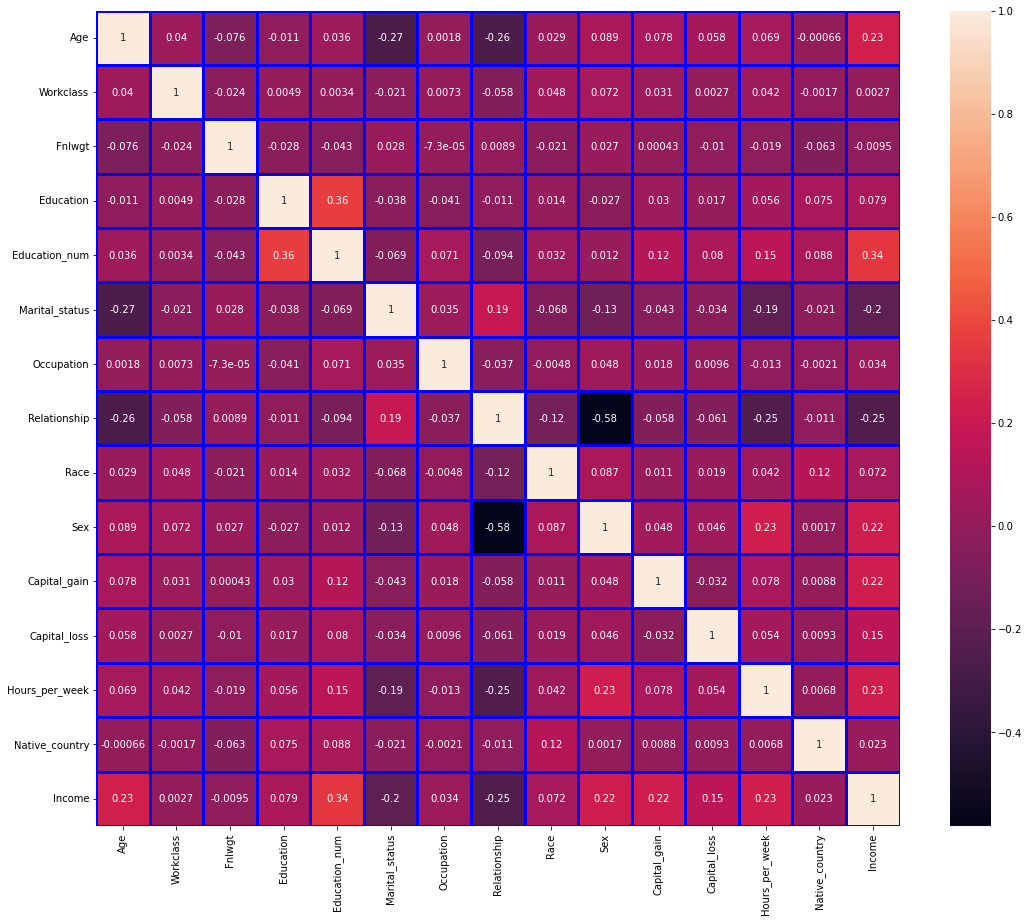

In [67]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), annot= True, linecolor= "blue",  linewidths= 3)
plt.show()

Observation:

Occupation, education, race, native_country are less correlated with target.    

Maximum value of correlation with target variable is between Education_num and Income.

Fnlwgt and Workclass are very less correlated with target.




# Correlation Of Income with Others

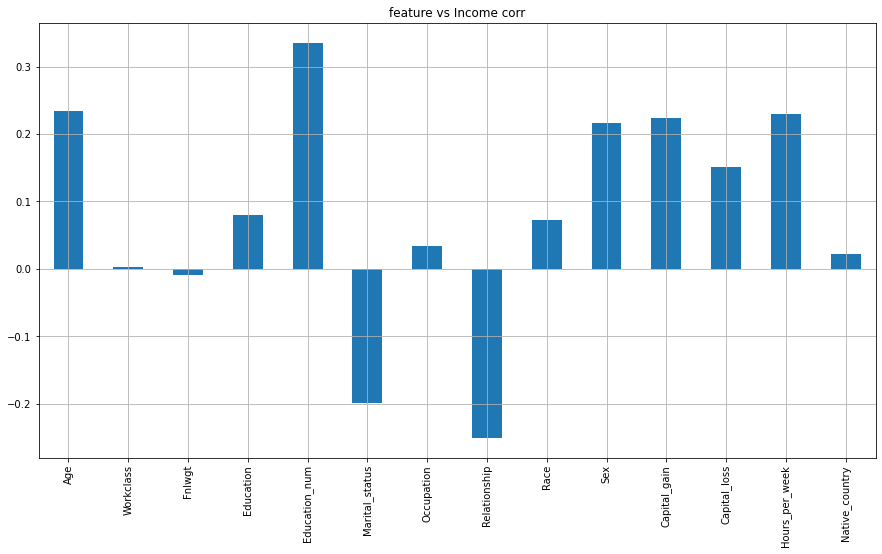

In [68]:
data.drop("Income", axis=1).corrwith(data["Income"]).plot(kind='bar',
                    figsize=(15,8),grid='True',title='feature vs Income corr')
plt.show()


In [69]:
data.drop(['Workclass' , 'Fnlwgt'],axis =1, inplace= True)
data.columns


Index(['Age', 'Education', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

# Checking Outliers 

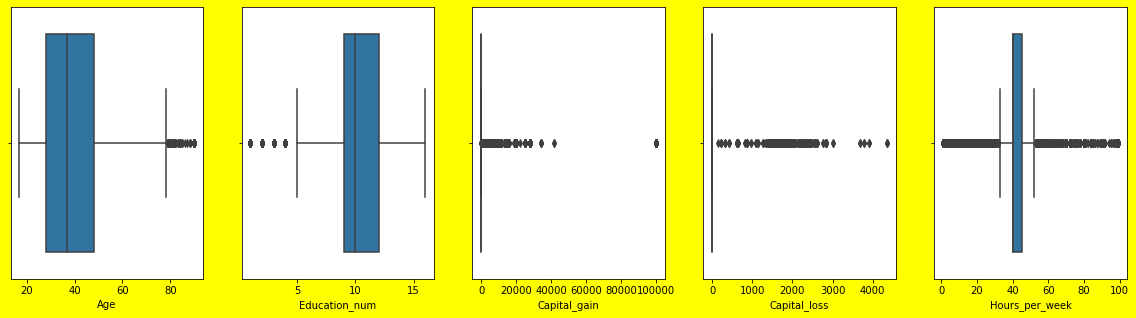

In [70]:
# Checking Outliers

plt.figure(figsize=(20,5),facecolor='yellow')
plotnumber=1
data1= data .drop(["Education", "Occupation", "Marital_status","Relationship", "Race", "Sex", "Native_country", "Income"], axis=1)
for x in data1:
    if plotnumber<=6:
        ax=plt.subplot(1,5,plotnumber)
        sns.boxplot(data1[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

Observation

There is outiers in features columns.



# Removal of Outliers

the Z Score =3 Any data with Z Score>3, should to be rejected

In [71]:
# Using Zscore
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))


(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64), array([11, 10,  6, ...,  6,  6,  6], dtype=int64))


In [72]:
data1 = data[(z<3).all(axis = 1)]
data1.head()


,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,9,13,2,3,0,4,1,0,0,13,38,0
1,38,11,9,0,5,1,4,1,0,0,40,38,0
2,53,1,7,2,5,0,2,1,0,0,40,38,0
4,37,12,14,2,3,5,4,0,0,0,40,38,0
5,49,6,5,3,7,1,2,0,0,0,16,22,0


In [73]:
data1.shape


(28074, 13)

In [74]:
data.shape


(32536, 13)

In [75]:
# Data Loss

print ("Percentage of data loss",(data.shape[0]- data1.shape[0])/data.shape[0])


Percentage of data loss 0.1371403983280059


# Correlation after Encoding

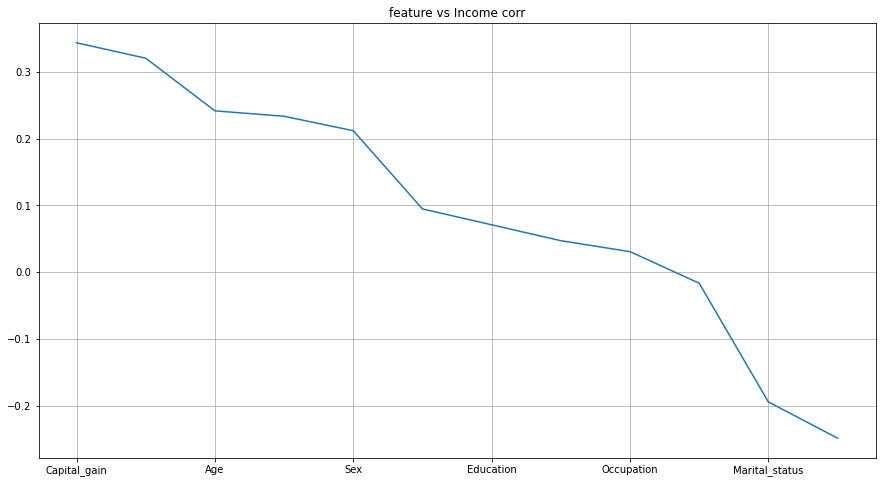

In [76]:
data1.drop("Income", axis=1).corrwith(data1["Income"]).sort_values(ascending=False) .plot(kind='line',
                    figsize=(15,8),grid='True',title='feature vs Income corr')
plt.show()


# Checking Skewness

In [77]:
data1.skew()


Age                0.487919
Education         -0.955265
Education_num     -0.147568
Marital_status    -0.046476
Occupation         0.015698
Relationship       0.751671
Race              -2.549433
Sex               -0.689872
Capital_gain       4.925018
Capital_loss      29.676186
Hours_per_week    -0.359251
Native_country    -5.349560
Income             1.322727
dtype: float64

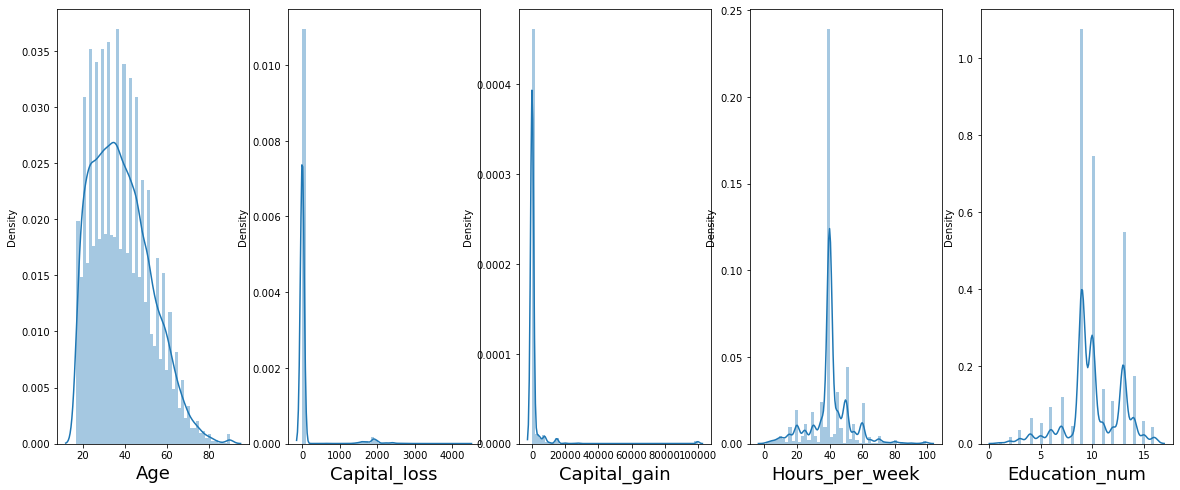

In [78]:
plt.figure(figsize=(20,8),facecolor='white')
plotnum=1
for col in data[['Age','Capital_loss','Capital_gain','Hours_per_week', 'Education_num']]:
    if plotnum<=5:
        plt.subplot(1,5,plotnum)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=18)
    plotnum+=1
plt.show()

Observation 

Capital_gain and Capital_loss have a lot of skewness.


# Balancing Data

In [79]:
# Balanceing target variable
#0 means <=50k
#1 means >50k
data['Income'].value_counts() 



0    24697
1     7839
Name: Income, dtype: int64

In [80]:
# Using SMOTE

from imblearn.over_sampling import SMOTE
over = SMOTE()



In [81]:
# splitting data in target and dependent feature

x = data.drop(['Income'], axis =1)
y = data['Income']
x,y = over.fit_resample(x,y)
y.value_counts()


0    24697
1    24697
Name: Income, dtype: int64

# Checking Multicollinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data1.values,i)for i in range(data1.shape[1])]
vif["Features"] = data1.columns
vif


,VIF,Features
0,10.415170,Age
1,9.299361,Education
2,24.045839,Education_num
3,4.357184,Marital_status
4,3.371870,Occupation
5,2.937796,Relationship
6,35.879284,Race
7,4.550044,Sex
8,1.209772,Capital_gain
9,1.004205,Capital_loss


Observation
    
Multicollinearity present between different features.

Education_num, Race, Hours_per_week, Native_country have a huge multicollinerity with others features.




#  PCA 

In [83]:
# Principal Component Analysis

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)


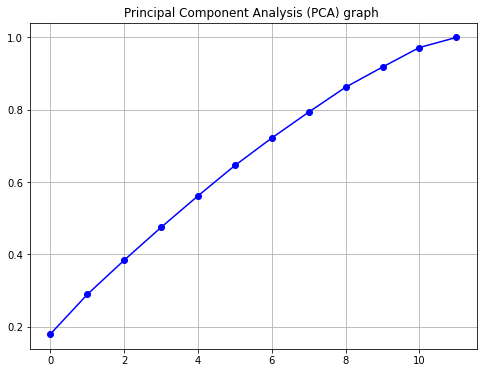

In [84]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()


Observations
    
To get 90% variance gives the first 9 component.

In [85]:
pca_new = PCA(n_components=9)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
prin_x.head()


,0,1,2,3,4,5,6,7,8
0,-0.307356,0.279807,-0.597407,0.798256,-0.174950,0.505316,-0.980294,1.735495,0.192603
1,-0.701103,0.425712,-0.526311,0.934613,-0.165513,-0.209273,-0.456157,-0.707977,-0.141382
2,0.003290,3.012837,0.951063,0.718501,-0.088032,0.531962,0.657213,0.166870,-2.032046
3,2.905188,-0.062831,5.060106,-0.128522,1.199366,0.063376,-0.690566,-1.734802,2.402259
4,1.774613,-2.174477,-0.257768,1.183961,0.097337,-0.175673,0.078587,-0.851187,0.406040


# Using different Classification ML Models for Income

Find best Random state


In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(1, 400):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)



Best accuracy is 0.7799821847922909 on Random_state 24


In [87]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)


Training feature shape: (37045, 9)
Training target shape: (37045,)
Test feature shape: (12349, 9)
Test target shape: (12349,)


# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=155)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))



accu score :  0.7769859907684833
cof_mat:
  [[4808 1427]
 [1327 4787]]
classification report:
                precision    recall  f1-score   support

           0       0.78      0.77      0.78      6235
           1       0.77      0.78      0.78      6114

    accuracy                           0.78     12349
   macro avg       0.78      0.78      0.78     12349
weighted avg       0.78      0.78      0.78     12349

-----------
-----------
training score :  0.7674989877176407
testing score :  0.7769859907684833


 Hyperparameter tuning

In [89]:
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)


best params :  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [90]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))



accu score :  0.7793343590574136
cof_mat:

  [[4787 1448]
 [1277 4837]]
classification report:
                precision    recall  f1-score   support

           0       0.79      0.77      0.78      6235
           1       0.77      0.79      0.78      6114

    accuracy                           0.78     12349
   macro avg       0.78      0.78      0.78     12349
weighted avg       0.78      0.78      0.78     12349

-----------
-----------
training score :  0.7699284653799433
testing score :  0.7793343590574136


Observations:
    
R2 score slightly improved.

# DecisionTree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))


     

accu score :  0.8218479229087375


cof_mat:  [[5081 1154]
 [1046 5068]]


classification report: 

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      6235
           1       0.81      0.83      0.82      6114

    accuracy                           0.82     12349
   macro avg       0.82      0.82      0.82     12349
weighted avg       0.82      0.82      0.82     12349

-----------
-----------
training score :  0.9669321095964367
testing score :  0.8218479229087375


Hyperparameter tuning

In [92]:
# Using GridSearchCV

param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=7, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)



best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'best'}


In [93]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))


accu score :  0.7922098955381003


cof_mat:  [[4715 1520]
 [1046 5068]]


classification report: 

               precision    recall  f1-score   support

           0       0.82      0.76      0.79      6235
           1       0.77      0.83      0.80      6114

    accuracy                           0.79     12349
   macro avg       0.79      0.79      0.79     12349
weighted avg       0.79      0.79      0.79     12349

-----------
-----------
training score :  0.7908759616682414
testing score :  0.7922098955381003


Observation:
    
Accuracy score is not improved after using GridSearchCV with DecisionTree Classifier.



# K Neighbors Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knc= KNeighborsClassifier()
knc.fit(x_train, y_train)

y_pred = knc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', knc.score(x_train, y_train))
print('testing score : ', knc.score(x_test, y_test))

accu score :  0.8470321483520933


cof_mat:  [[5065 1170]
 [ 719 5395]]


classification report: 

               precision    recall  f1-score   support

           0       0.88      0.81      0.84      6235
           1       0.82      0.88      0.85      6114

    accuracy                           0.85     12349
   macro avg       0.85      0.85      0.85     12349
weighted avg       0.85      0.85      0.85     12349

-----------
-----------
training score :  0.8870832770954244
testing score :  0.8470321483520933


Hyperparameter tunning

In [95]:
# Using Gridsearch CV

param = {'algorithm' : ['auto','kd_tree'],
             'leaf_size' : [30,40,10,],
             'n_neighbors' : [10]}
    

gridsearchknc = GridSearchCV(estimator = knc, param_grid=param, cv=5)

gridsearchknc.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknc.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10}


In [96]:
grid_knc_best = gridsearchknc.best_estimator_

grid_knc_best.fit(x_train, y_train)

y_pred = grid_knc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))
print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))


accu score :  0.8404729127864604


cof_mat:  [[5189 1046]
 [ 924 5190]]


classification report:                precision    recall  f1-score   support

           0       0.85      0.83      0.84      6235
           1       0.83      0.85      0.84      6114

    accuracy                           0.84     12349
   macro avg       0.84      0.84      0.84     12349
weighted avg       0.84      0.84      0.84     12349

-----------
-----------
training score :  0.7908759616682414
testing score :  0.7922098955381003


Observation:
    
Accuracy score, training score, testing score are not improved after using GridSearchCV.

# Random Forest Classifier


In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8639565956757632


cof_mat:  [[5273  962]
 [ 718 5396]]


classification report:                precision    recall  f1-score   support

           0       0.88      0.85      0.86      6235
           1       0.85      0.88      0.87      6114

    accuracy                           0.86     12349
   macro avg       0.86      0.86      0.86     12349
weighted avg       0.86      0.86      0.86     12349

-----------
-----------
training score :  0.966905115400189
testing score :  0.8639565956757632


Hyperparameter tuning

In [98]:
# Using Gridsearch CV

params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy","log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)


best params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100}


In [99]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))


accu score :  0.8654951817960969


cof_mat:  [[5258  977]
 [ 684 5430]]


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6235
           1       0.85      0.89      0.87      6114

    accuracy                           0.87     12349
   macro avg       0.87      0.87      0.87     12349
weighted avg       0.87      0.87      0.87     12349

-----------
-----------
training score :  0.9669321095964367
testing score :  0.8654951817960969


Observation:
    
Accuracy score is not improved after using GridSearchCV.

# AdaBoost Classifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))


     

accu score :  0.7902664183334683


cof_mat:  [[4788 1447]
 [1143 4971]]


classification report:                precision    recall  f1-score   support

           0       0.81      0.77      0.79      6235
           1       0.77      0.81      0.79      6114

    accuracy                           0.79     12349
   macro avg       0.79      0.79      0.79     12349
weighted avg       0.79      0.79      0.79     12349

-----------
-----------
training score :  0.7864759076798489
testing score :  0.7902664183334683


Hyperparameter tunning

In [101]:
# Using Gridsearch CV

params = {'n_estimators' : [50,40, 60], 'learning_rate': [1,0.1,0.01, 0.001] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 60}


In [102]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))



accu score :  0.7903473965503279


cof_mat:  [[4798 1437]
 [1152 4962]]


classification report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      6235
           1       0.78      0.81      0.79      6114

    accuracy                           0.79     12349
   macro avg       0.79      0.79      0.79     12349
weighted avg       0.79      0.79      0.79     12349

-----------
-----------
training score :  0.787150762586044
testing score :  0.7903473965503279


Observation:
    
Accuracy score is slightly improved after using GridSearchCV.

# Support Vector Classifier ('rbf')

In [103]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))


In [104]:
svmkernel('rbf')

accu score :  0.8249250951494048


cof_mat:  [[4759 1476]
 [ 686 5428]]


classification report: 

               precision    recall  f1-score   support

           0       0.87      0.76      0.81      6235
           1       0.79      0.89      0.83      6114

    accuracy                           0.82     12349
   macro avg       0.83      0.83      0.82     12349
weighted avg       0.83      0.82      0.82     12349

-----------
-----------
training score :  0.8195977864759076
testing score :  0.8249250951494048


# Support Vector Classifier ('linear')

In [105]:
svmkernel('linear')

accu score :  0.7818446837800631


cof_mat:  [[4738 1497]
 [1197 4917]]


classification report: 

               precision    recall  f1-score   support

           0       0.80      0.76      0.78      6235
           1       0.77      0.80      0.78      6114

    accuracy                           0.78     12349
   macro avg       0.78      0.78      0.78     12349
weighted avg       0.78      0.78      0.78     12349

-----------
-----------
training score :  0.7730597921446889
testing score :  0.7818446837800631


# Support Vector Classifier ('poly')

In [106]:
svmkernel('poly')

accu score :  0.7381974248927039


cof_mat:  [[3407 2828]
 [ 405 5709]]


classification report: 

               precision    recall  f1-score   support

           0       0.89      0.55      0.68      6235
           1       0.67      0.93      0.78      6114

    accuracy                           0.74     12349
   macro avg       0.78      0.74      0.73     12349
weighted avg       0.78      0.74      0.73     12349

-----------
-----------
training score :  0.7358347955189635
testing score :  0.7381974248927039


Observation:

The best model for this dataset Random Forest Classifier.


# Checking  Cross validation

In [107]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [grid_log_best,grid_clf_best , grid_rf_best, grid_knc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")


Cross Validation Score of : LogisticRegression(C=0.01, solver='newton-cg')

 Cross Validation Score :  [0.75896273 0.76562279 0.76828231 0.77636054 0.77749433 0.77324263
 0.77210884]

Mean CV Score : 0.770296311436712

Std deviation : 0.006034431288176774

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='sqrt')

 Cross Validation Score :  [0.8052997  0.80331586 0.82213719 0.83772676 0.84367914 0.83886054
 0.82553855]

Mean CV Score : 0.8252225336985946

Std deviation : 0.014973491456384281

-----------
-----------
Cross Validation Score of : RandomForestClassifier(criterion='entropy')

 Cross Validation Score :  [0.8439847  0.84440981 0.88662132 0.90617914 0.91227324 0.90887188
 0.90221088]

Mean CV Score : 0.8863644234997183

Std deviation : 0.02771766605035676

-----------
-----------
Cross Validation Score of : KNeighborsClassifier(n_neighbors=10)

 Cross Validation Score :  [0.80473

Observation

Random Forest Classifier gives good accuracy and maximum f1 score with a good Cross-validation score.

# ROC / AUC Curves

In [108]:
grid_log_best.fit(x_train, y_train)
clf.fit(x_train, y_train)
grid_knc_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")


All model are trained


In [109]:
grid_log_best.fit(x_test, y_test)
clf.fit(x_test, y_test)
grid_knc_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


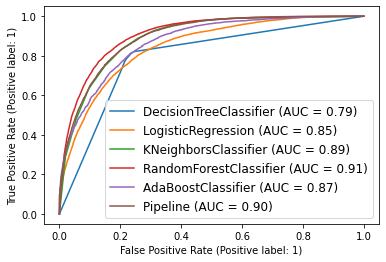

In [110]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_train, y_train)

plot_roc_curve(grid_log_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_knc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':12}, loc='lower right')
plt.show()

According to the above plot, the best AUC of training is Random Forest

AUC plot of testing

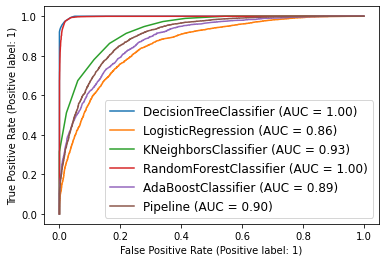

In [111]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_test, y_test)

plot_roc_curve(grid_log_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_knc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':12}, loc='lower right')
plt.show()

To choose best model , let's check the minimum variation of training and testing AUC score.

The best model is Random Forest Classifier for this dataset.

# Final Model:

In [112]:
grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))



accu score :  0.8652522471455178


cof_mat:  [[5272  963]
 [ 701 5413]]


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      6235
           1       0.85      0.89      0.87      6114

    accuracy                           0.87     12349
   macro avg       0.87      0.87      0.87     12349
weighted avg       0.87      0.87      0.87     12349

-----------
-----------
training score :  0.966905115400189
testing score :  0.8652522471455178


# Confusion matrix of best model

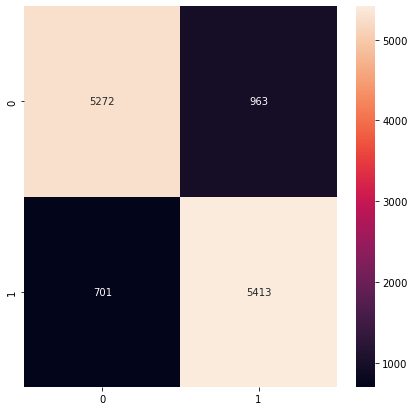

In [113]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()


# saving Model

In [114]:
import pickle
pickle.dump(grid_rf_best, open("Census_Income_Classification_model", "wb"))
load_Census_Income_Classification_model= pickle.load(open("Census_Income_Classification_model", "rb"))


In [115]:
y_pred = load_Census_Income_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=5)


,Predicted Values,Actual Values
4623,1,0
4670,0,1
12023,0,0
2614,0,0
1161,0,0
